<a href="https://github.com/hernansalinas/autogrades/tree/main/Evaluaciones/Evaluacion01_2023_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [264]:
#@title Librerias
import numpy as np
from scipy.optimize import newton
from scipy.optimize import bisect
import matplotlib.pyplot as plt
from scipy.interpolate import CubicHermiteSpline
from scipy.interpolate import CubicSpline
import pandas as pd



# Parcial 01: Metodos computacionales para fisicos 
### Fecha 3/30/23

La entrega del examen es a través del github en la página del curso, en el directorio asociado a cada uno. 

Ayuda :

| Comando | Descripción |
| --- | --- |
| pd.read_csv() | Lee un archivo CSV y lo convierte en un DataFrame de Pandas |
| pd.read_excel() | Lee un archivo de Excel y lo convierte en un DataFrame de Pandas |
| pd.read_json() | Lee un archivo JSON y lo convierte en un DataFrame de Pandas |
| df.head() | Muestra las primeras filas del DataFrame |
| df.tail() | Muestra las últimas filas del DataFrame |
| df.info() | Muestra información sobre el DataFrame |
| df.describe() | Muestra estadísticas descriptivas del DataFrame |
| df.dropna() | Elimina filas con valores faltantes |
| df.drop_duplicates() | Elimina filas duplicadas |
| df.groupby() | Agrupa el DataFrame por una o más columnas |
| df.sort_values() | Ordena el DataFrame por una o más columnas |
| df.to_csv() | Guarda el DataFrame como un archivo CSV |
| df.loc[condicion] | Crea una máscara booleana para seleccionar filas que cumplan con ciertas condiciones |
| df[df["columna"]== x] | Crea una máscara booleana y a la aplica al dataframe en caso de el valor de la columna coincida con la variable |


Referencias: 

- Dataset tomado y modificado de : https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities

- http://www.sc.ehu.es/sbweb/fisica3/fluidos/stokes_1/stokes_1.html
- Lindemuth J. The effect of air resistance on falling balls. Am. J. Phys. 39, July 1971, pp. 757-759


## 1. (50%). Movimiento de una esfera de radio r en un fluido.

 Una esfera de radio $R$ que asciende o desciende por un fluido puede ser modelada a través de un modelo de partícula, sometida a tres fuerzas: el peso, el empuje y la fuerza rozamiento. Las  ecuaciones de posición (x) y velocidad (v) para un sistema de refencia úbicado en la base del fluido, pueden ser escritas como:

\begin{equation}
x = \frac{G}{\alpha} \left( 1+\frac{\alpha v_0}{G} \right)(1-e^{-\alpha t}) - \frac{G}{\alpha}t
\end{equation}

\begin{equation}
v= \left ( v_0 +\frac{G}{\alpha} \right )e^{-\alpha t} - \frac{G}{\alpha}
\end{equation}



donde $G=\left( 1-\frac{\rho_f}{\rho} \right)g$, con $\rho_f$, $\rho$ la densidad del fluido y la esfera respectivamente y $g=9.8$ la aceleración de la gravedad y $\alpha$  una constante que depende del radio de la esfera, la viscosidad y la densidad.
$\alpha=\frac{9\eta}{2R^2\rho}$.

Suponga que una esferita de radio $R=2\times10^{-5}m$ es lanzada verticalmente hacia arriba en el agua, con una rapidez de $v_0=0.01$m/s.
Tomando la densidad del agua en  $\rho_f =10000 kg/m^3$,  la densidad de la esfera en $\rho=2670 kg/m^3$ y la viscosidad en $\eta=0.001 kg/ms$.  Determine: 


In [265]:
#Datos
R = 2e-5 # m
v0 = 0.01 #m/s 
rhof = 1000 # Kg/m^3
rho = 2670 # Kg/m^3
eta = 0.001 # Kg/ms
g = 9.8
G = (1-rhof/rho)*g
alfa = (9*eta)/(2*R**2*rho)


In [266]:
#Definimos x(t) y v(t)

def x(t):
  return (G/alfa**2)*(1+(alfa*v0)/G)*(1-np.exp(-alfa*t))-(G/alfa)*t

def v(t):
  return (v0+G/alfa)*(np.exp(-alfa*t))-(G/alfa)


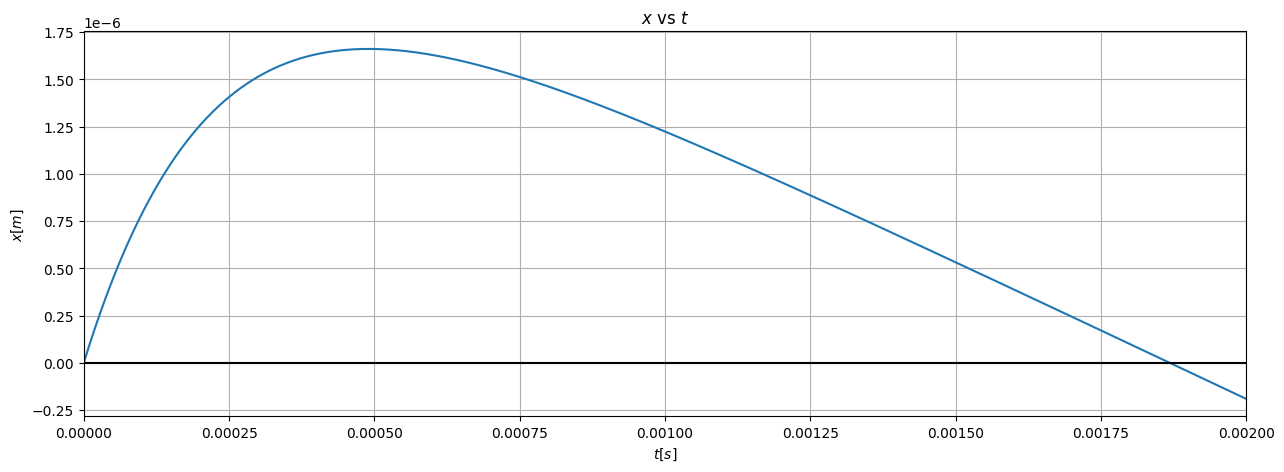

In [267]:
t = np.linspace(0,0.002,10000)

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(t,x(t))
ax.set_title('$x$ vs $t$')
ax.set_xlabel('$t [s]$')
ax.set_ylabel('$x [m]$')
ax.hlines(0,0,0.00200,'k')
ax.set_xlim(0,0.00200)
ax.grid()

--------------------------------------------------------------------------------
Por método de la secante:
El tiempo total en que la esfera asciende y desciende es de; 0.00187 s 
--------------------------------------------------------------------------------



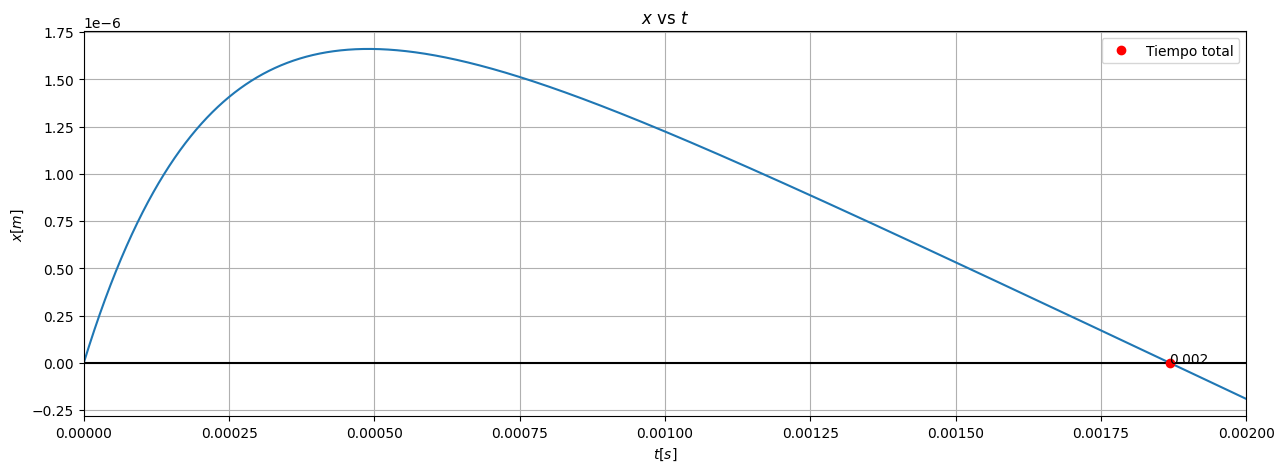

In [268]:
root = newton(x,0.00175)

print('----'*20)
print('Por método de la secante:')
print(f'El tiempo total en que la esfera asciende y desciende es de; {root:.5f} s ')
print('----'*20)
print('')


fig, ax = plt.subplots(figsize=(15,5))
ax.plot(t,x(t))
ax.hlines(0,0,0.00200,'k')
ax.plot(root,x(root),'ro',label='Tiempo total')
ax.set_xlim(0,0.00200)
ax.text(root,x(root),f'{root:.3f}')
ax.set_title('$x$ vs $t$')
ax.set_xlabel('$t [s]$')
ax.set_ylabel('$x [m]$')
ax.legend()


ax.grid()

In [269]:
print('----'*20)
print(f'Rapidez final, con la que llega nuevamente de donde fue lanzada {v(root):.4f} m/s')
print('----'*20)
print('')

--------------------------------------------------------------------------------
Rapidez final, con la que llega nuevamente de donde fue lanzada -0.0015 m/s
--------------------------------------------------------------------------------



## 2. (50%). Interpolación
Para los siguientes datos de temperatura media como función del tiempo de los últimos años de  Bogotá y Barcelona ([Temperature_Bogota_Barcelona](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv)). Aplique el método de  hermite y spline cúbicos. Para ello realice lo siguiente:

1. Leer el dataset desde la url, con el comando pd.read_csv.
2. Adicionar una nueva columna AvgTempCelcius con la temperatura en grados celcius. $ C=(F-32)/1.8$
3. Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Bogotá.
4. Realizar un gráfico de AvgTempCelcius como función del año para la ciudad de Barcelona.
4. Aplique el  metodos de interpolación de hermite para Bogotá y el metodo de interpolación de splines cubicos para Barcelona. 


In [270]:
#Leer el dataset
df = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv')

In [271]:
#Adicionar una nueva columna AvgTempCelcius con la temperatura en grados celcius.
df['AvgTempCelcius'] = df['AvgTemperature'].apply(lambda x : (x-32)/1.8)

In [272]:
#Vemos los datos
df.head()

,Unnamed: 0,Year,City,Month,Day,AvgTemperature,AvgTempCelcius
0,0,1995,Barcelona,6.526027,15.720548,62.019178,16.677321
1,1,1995,Bogota,6.526027,15.720548,54.963014,12.757230
2,2,1996,Barcelona,6.513661,15.756831,61.125956,16.181087
3,3,1996,Bogota,6.513661,15.756831,55.083333,12.824074
4,4,1997,Barcelona,6.526027,15.720548,62.612329,17.006849


In [273]:
#Sacamos las colunmas de interes 

year_bogota = df[df.City == 'Bogota']['Year']
celcius_bogota = df[df.City == 'Bogota']['AvgTempCelcius']

year_barcelona = df[df.City == 'Barcelona']['Year']
celcius_barcelona = df[df.City == 'Barcelona']['AvgTempCelcius']

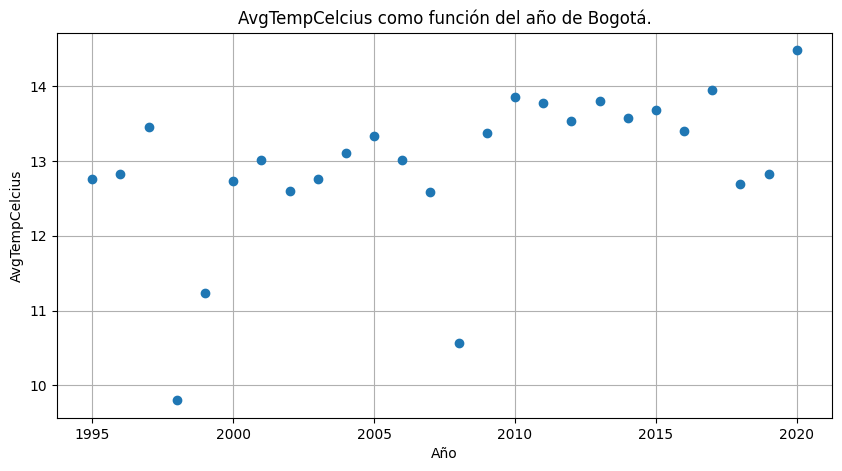

In [274]:
#gráfico de AvgTempCelcius como función del año para la ciudad de Bogotá
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(year_bogota , celcius_bogota,'o')
ax.set_title('AvgTempCelcius como función del año de Bogotá.')
ax.set_xlabel('Año')
ax.set_ylabel('AvgTempCelcius')
ax.grid()

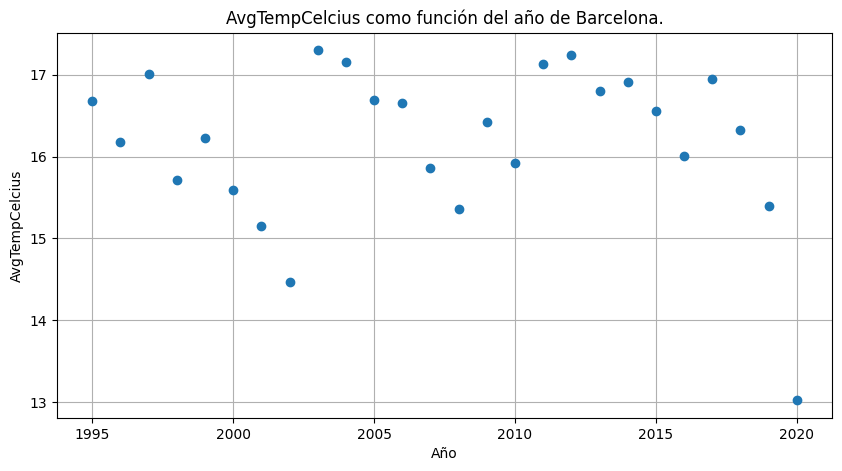

In [275]:
#gráfico de AvgTempCelcius como función del año para la ciudad de barcelona
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(year_barcelona , celcius_barcelona,'o')
ax.set_title('AvgTempCelcius como función del año de Barcelona.')
ax.set_xlabel('Año')
ax.set_ylabel('AvgTempCelcius')
ax.grid()

In [276]:
#Calculamos la derivada para utilizar el metodos de interpolación de hermite para Bogotá
dydx = np.diff(celcius_bogota)

In [277]:
#tomamos solo 25 puntos por que la derivada me elimina un dato

#interpolación de hermite para Bogotá
PCHS = CubicHermiteSpline( year_bogota[1:26],celcius_bogota[1:26],dydx) 

In [278]:
#Aumentamos la cantidad de datos para utilizarlos en PCHS
yearsh = np.linspace(year_bogota.min(),year_bogota.max(),1000)

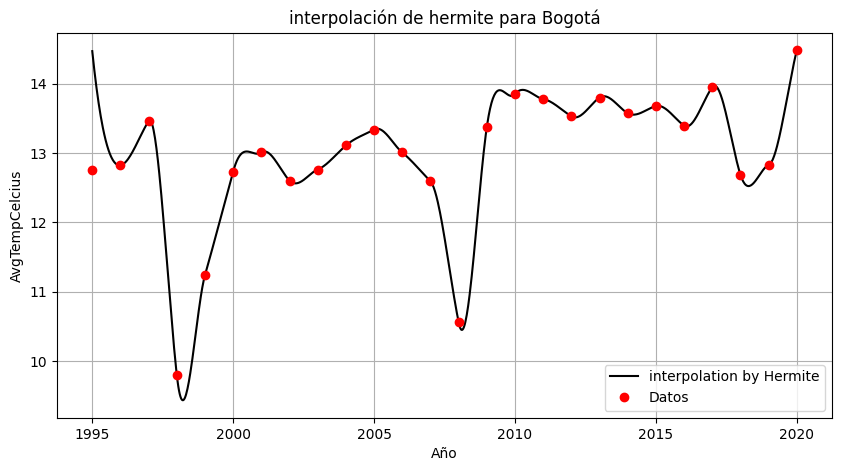

In [279]:
#Graficamos PCHS sobre los datos 
fig , ax = plt.subplots(figsize=(10,5))
ax.plot(yearsh,PCHS(yearsh),'k',label='interpolation by Hermite')
ax.plot(year_bogota,celcius_bogota,'ro',label='Datos')
ax.legend()
ax.set_title('interpolación de hermite para Bogotá')
ax.set_xlabel('Año')
ax.set_ylabel('AvgTempCelcius')
ax.grid()

In [280]:
#interpolación de splines cubicos para Barcelona
Pcs = CubicSpline(year_barcelona,celcius_barcelona)

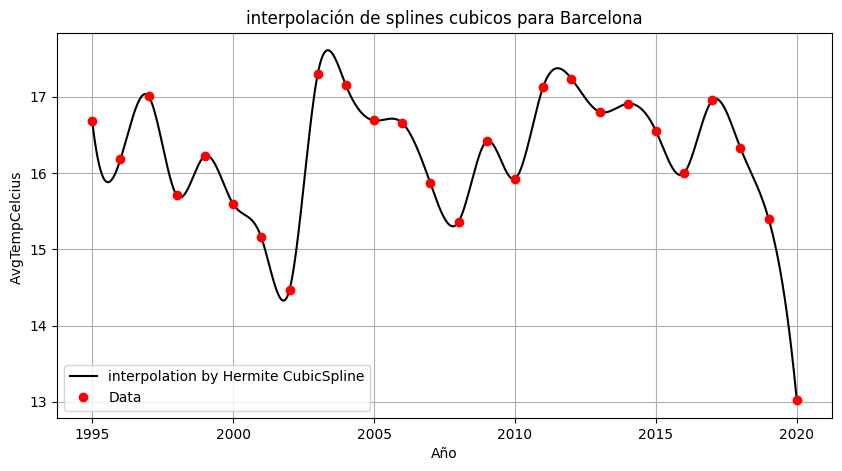

In [281]:
yearsp = np.linspace(year_barcelona.min(),year_barcelona.max(),1000)

fig , ax = plt.subplots(figsize=(10,5))

ax.plot(yearsp,Pcs(yearsp),'k',label='interpolation by Hermite CubicSpline')
ax.plot(year_barcelona,celcius_barcelona,'ro',label='Data')
ax.set_xlabel('Año')
ax.set_ylabel('AvgTempCelcius ')
ax.set_title('interpolación de splines cubicos para Barcelona')
ax.legend()
ax.grid()